This notebook will use cartopy to plot Grans Passage bathy and coastline.

In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import interpolate
import cmocean
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


from scipy import io

import utm

In [2]:
import cartopy.feature as cfeature

In [3]:
GP_deploy_lon = -66.339567
GP_deploy_lat = 44.276333

Hali_lon = -63.571004 
Hali_lat = 44.646039

# Big picture location

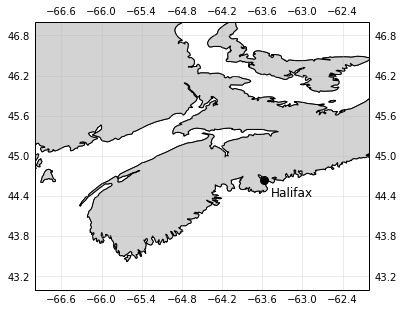

In [166]:
extent=[-67, -62, 43, 47]
projection = ccrs.PlateCarree()


land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])
# create map

# create map
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1,projection=projection)
ax.gridlines(draw_labels=True, alpha=0.3)
ax.set_extent(extent, crs=projection)

ax.coastlines(resolution='10m')
ax.add_feature(land_10m)

#plt.plot(GP_deploy_lon, GP_deploy_lat, 'r*',transform=projection, markersize=12)
#plt.text(GP_deploy_lon, GP_deploy_lat-0, 'GP', fontsize=26, color = 'k')
plt.plot(Hali_lon, Hali_lat, 'ok',transform=projection, markersize=8)
plt.text(Hali_lon+0.1, Hali_lat-0.25, 'Halifax', transform=projection, fontsize=12, color = 'k');

# Small picture

In [49]:
GP_mat = io.loadmat('F:/GP_map/GPtoPPcoastline_clean.mat')

In [68]:
GP_mat['xUTM'][~np.isnan(GP_mat['xUTM'])]

array([244903., 244902., 244901., ..., 239256., 239250., 239241.])

In [70]:
lat, lon = utm.to_latlon(GP_mat['xUTM'][~np.isnan(GP_mat['xUTM'])],GP_mat['yUTM'][~np.isnan(GP_mat['xUTM'])], zone_number=20,zone_letter='T')


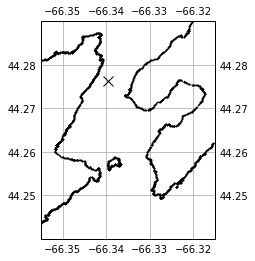

In [169]:
extent=[-66.315, -66.355, 44.24, 44.29]
projection = ccrs.PlateCarree()


land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])
ocean_10m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])
# create map

# create map
ax = plt.subplot(1,1,1,projection=projection)

ax.set_extent(extent, crs=projection)

#ax.coastlines(resolution='10m')
#ax.add_feature(land_10m)
#ax.add_feature(ocean_10m)
ax.plot(lon, lat, 'k.', markersize=1)
gl = ax.gridlines(crs=projection, draw_labels=True)
gl.ylocator = mticker.FixedLocator([44.24, 44.25, 44.26, 44.27, 44.28, 44.29])
gl.xlocator = mticker.FixedLocator([-66.31, -66.32, -66.33, -66.34, -66.35, -66.36])

plt.plot(GP_deploy_lon, GP_deploy_lat, 'kx',transform=projection, markersize=10)
#plt.text(GP_deploy_lon+1, GP_deploy_lon-1.5, 'GP', transform=projection, fontsize=16, color = 'k')


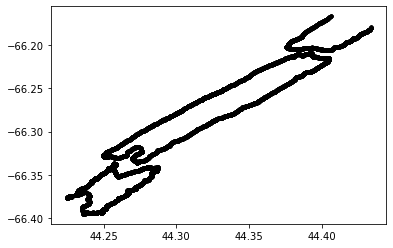

In [78]:

plt.plot(lat, lon, 'k.')